In [1]:
import numpy as np
import pandas as pd

## https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

#### Load dataset

In [2]:
data = pd.read_csv(r'C:\Users\looka\OneDrive\Documents\NLP\Product_Reviews.csv')

In [3]:
data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Section 1: Data prepperation and preprocessing

In [4]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

###### remove the irrelevant columns

In [5]:
data.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time'], axis = 1, inplace = True)

In [6]:
data.head(4)

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...


###### remove duplicates

In [7]:
data.isnull().any()

Score      False
Summary     True
Text       False
dtype: bool

In [8]:
data.describe()

,Score
count,568454.000000
mean,4.183199
std,1.310436
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
len(data.columns)

3

In [10]:
for column_name in data.columns:
    print(data[column_name].is_unique)

False
False
False


In [11]:
data.columns.is_unique

True

In [12]:
data.drop_duplicates(subset=['Text'], inplace = True)

In [13]:
len(data)

393579

###### Remove non-alphaneumeric characters and convert to the lower case
- non-alphaneumeric characters include any character that is not a letter (A-Z, a-z) or a number (0-9)

In [14]:
import re

In [15]:
data['Text'] = data['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x).lower()))

# apply the lambda function allong teh axis of the data frame

# anonymous function, takes one argument x. This function is applied to each element of the text column

# regular expression substitution, (^) not in the set specified which is (\w) not alphaneumeric and (\s) not white space, convert it to '' 
#and than convert the x into strin and then convert to lowercase

In [16]:
#!pip install nltk

###### Remove stopwords

In [17]:
import nltk
from nltk.corpus import stopwords

In [18]:
stop_words = stopwords.words('english')

In [19]:
data['Text'] = data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word is not stop_words]))

In [20]:
data['Text'].head(5)

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: Text, dtype: object

###### stem the words

In [21]:
from nltk.stem import PorterStemmer

In [22]:
#stemmer = PorterStemmer()

In [ ]:
# data['Text'] = data['Text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [ ]:
#data.head(5)

In [ ]:
### lets do it using batch system

In [22]:
stemmer = PorterStemmer()

## creating number of batches
batch_size = 1000
num_batches = len(data) // batch_size + 1
# num_batches : 394

def stem_batch(text_batch):
    return ' '.join([stemmer.stem(word) for word in text_batch.split()])


for i in range(num_batches):
    start_index = i * batch_size # lets say 3rd batch will start from index 3000 if the batch size is 1000
    end_index = min((i+1) * batch_size, len(data)) #  3rd batch last index will be min(4 * 1000 , 393579)
    data.loc[start_index:end_index, 'Text'] = data.loc[start_index:end_index, 'Text'].apply(stem_batch)

In [23]:
data.head(5)

,Score,Summary,Text
0,5,Good Quality Dog Food,i have bought sever of the vital can dog food ...
1,1,Not as Advertised,product arriv label as jumbo salt peanutsth pe...
2,4,"""Delight"" says it all",thi is a confect that ha been around a few cen...
3,2,Cough Medicine,if you are look for the secret ingredi in robi...
4,5,Great taffy,great taffi at a great price there wa a wide a...


#### Section 2: exploratory data analysis

###### Analyze the distribution of rating and sentiments in the dataset

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Score', ylabel='count'>

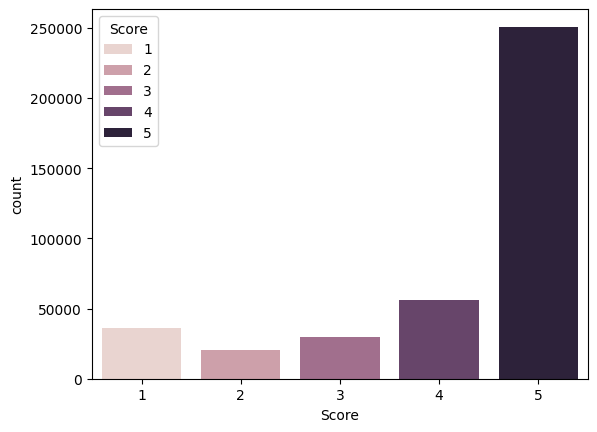

In [29]:
sns.countplot(x='Score', data = data, hue = "Score")

###### Create and visualization such as bar plots, histograms and words clouds to identify patterns and trends

In [31]:
!pip install wordcloud 

You should consider upgrading via the 'C:\Users\looka\OneDrive\Documents\NLP\nlp_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [34]:
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [36]:
nltk.download('vader_lexicon')
sa = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\looka\AppData\Roaming\nltk_data...


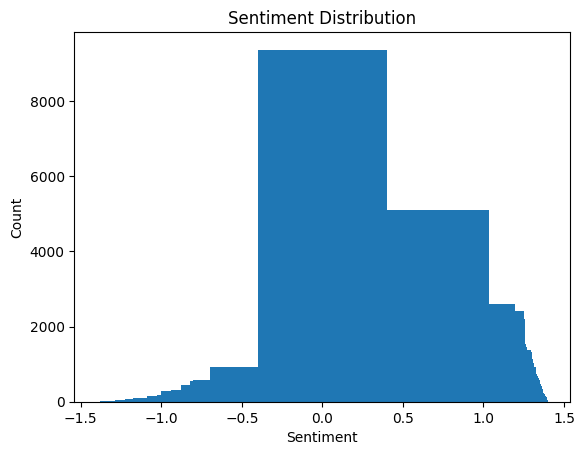

In [41]:
## Bar plot for sentiment distribution
data['Sentiment'] = data['Text'].apply(lambda x: sa.polarity_scores(x)['compound'])
sentiment_counts = data['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

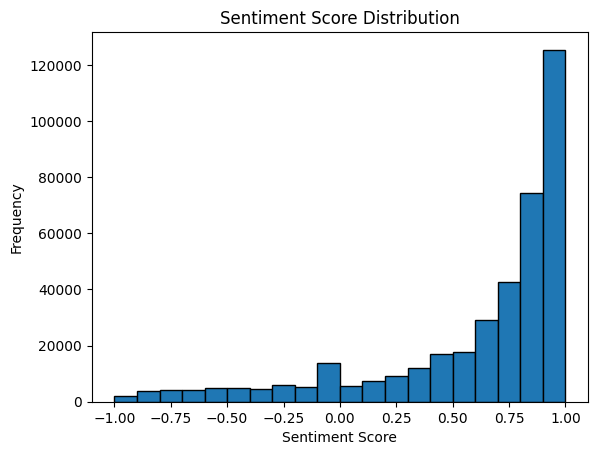

In [43]:
## histogram for sentiment scores
plt.hist(data['Sentiment'], bins = 20, edgecolor = 'black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')
plt.show()

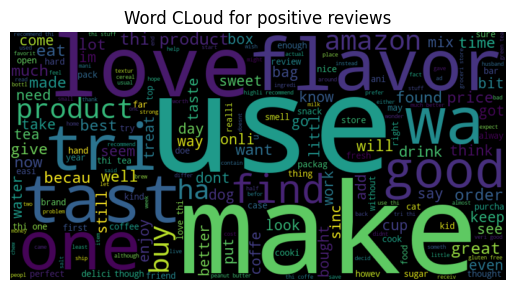

In [46]:
## word cloud for positive reviews
positive_reviews = ' '.join(data[data['Sentiment'] > 0]['Text'])
cloud_pos = WordCloud(width = 800, height = 400).generate(positive_reviews)
plt.imshow(cloud_pos, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word CLoud for positive reviews')
plt.show()

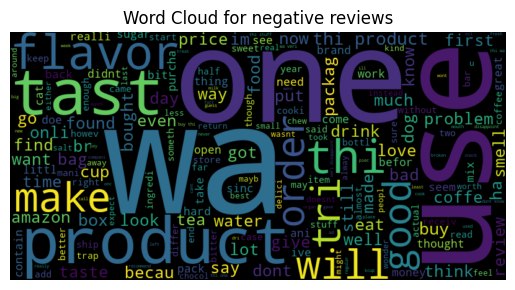

In [48]:
## word cloud for negative reviews
negative_reviews = ' '.join(data[data['Sentiment'] < 0]['Text'])
cloud_neg = WordCloud(width = 800, height = 400).generate(negative_reviews)
plt.imshow(cloud_neg, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for negative reviews')
plt.show()

In [49]:
data.head(5)

,Score,Summary,Text,Sentiment
0,5,Good Quality Dog Food,i have bought sever of the vital can dog food ...,0.9134
1,1,Not as Advertised,product arriv label as jumbo salt peanutsth pe...,-0.5664
2,4,"""Delight"" says it all",thi is a confect that ha been around a few cen...,0.7579
3,2,Cough Medicine,if you are look for the secret ingredi in robi...,0.4404
4,5,Great taffy,great taffi at a great price there wa a wide a...,0.9186


###### perform statistical analysis such as mean, median and mode of ratings

In [24]:
print('Mean: ', data['Score'].mean())
print('Median: ', data['Score'].median())
print('Mode: ', data['Score'].mode())

Mean:  4.179260072310768
Median:  5.0
Mode:  0    5
Name: Score, dtype: int64


#### Section 3: Feature Extraction

###### Convert the text data into numerical features using TF-IDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidf = TfidfVectorizer()
# covariate
X = tfidf.fit_transform(data['Text'])
y = data['Score']

#### Section 4 : Model Selection and training 

###### Vectorize the text using the previously fit CountVectorizer